# **Исследование данных онлайн-магазина**

Целью данного проекта является проведение всестороннего анализа данных датасета *Online Retail Dataset*, в котором хранится информация о заказах, совершенных различными пользователями в онлайн-магазине, в основном занимающемся продажей разнообразных подарков.

Исследование можно разбить на следующие этапы:


*   Загрузка данных
*   Предобработка данных
*   Исследовательский анализ данных
*   Расчет метрик







# **Загрузка данных**

В первую очередь считаем данные из датасета

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_excel("Online Retail.xlsx")

Выведем первые 5 записей нашего датасета:

In [5]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


# **Предобработка данных**

Для начала проверим наличие дубликатов в нашем датафрейме:

In [7]:
int(data.duplicated().sum())

5268

Удалим дубликаты:

In [8]:
data.drop_duplicates(inplace=True)

In [9]:
int(data.duplicated().sum())

0

Как видим, дубликатов в датафрейме не осталось. Теперь проверим пропуски в наших данных:

In [10]:
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135037
Country,0


Удалим пропуски в столбцах Description и CustomerID:

In [11]:
data.dropna(subset=['CustomerID', 'Description'], inplace=True)

In [12]:
data.isna().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


Выберем только значения с положительными значениями цены и количества товаров:

In [13]:
data = data[(data['Quantity'] > 0) & (data['UnitPrice'] > 0)]

Преобразуем тип данных поля InvoiceDate:

In [34]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
 9   Month        392692 non-null  period[M]     
 10  DayOfWeek    392692 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(4), period[M](1)
memory usage: 34.5+ MB


Для последующего анализа добавим в наш датафрейм новые признаки:

**TotalPrice** — общая стоимость заказа

**Month** — месяц совершения заказа

**DayOfWeek** — день недели совершения заказа

In [35]:
data['TotalPrice'] = data['UnitPrice'] * data['Quantity']
data['Month'] = data['InvoiceDate'].dt.to_period('M')
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Month,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010-12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010-12,2


# **Исследовательский анализ данных**

Информация о структуре нашего датафрейма:

In [16]:
data.shape

(392692, 11)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392692 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  float64       
 7   Country      392692 non-null  object        
 8   TotalPrice   392692 non-null  float64       
 9   Month        392692 non-null  period[M]     
 10  DayOfWeek    392692 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(1), int64(1), object(4), period[M](1)
memory usage: 34.5+ MB


In [18]:
data.nunique()

,0
InvoiceNo,18532
StockCode,3665
Description,3877
Quantity,301
InvoiceDate,17282
UnitPrice,440
CustomerID,4338
Country,37
TotalPrice,2939
Month,13


## **Частота встречаемости стран**

In [19]:
data['Country'].value_counts().sort_values(ascending=False).to_frame().head(7)

,count
Country,
United Kingdom,349203
Germany,9025
France,8326
EIRE,7226
Spain,2479
Netherlands,2359
Belgium,2031


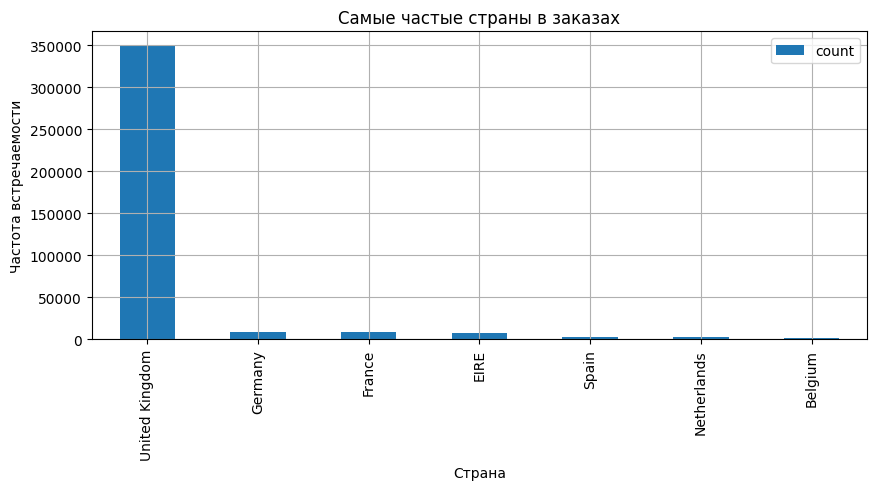

In [20]:
ax = data['Country'].value_counts().sort_values(ascending=False).head(7).plot.bar(figsize=(10,4))
plt.xlabel('Страна')
plt.ylabel('Частота встречаемости')
plt.grid()
plt.title('Самые частые страны в заказах')
plt.legend();

In [21]:
data['Country'].value_counts().sort_values(ascending=True).to_frame().head(7)

,count
Country,
Saudi Arabia,9
Bahrain,17
Czech Republic,25
Brazil,32
Lithuania,35
Lebanon,45
RSA,57


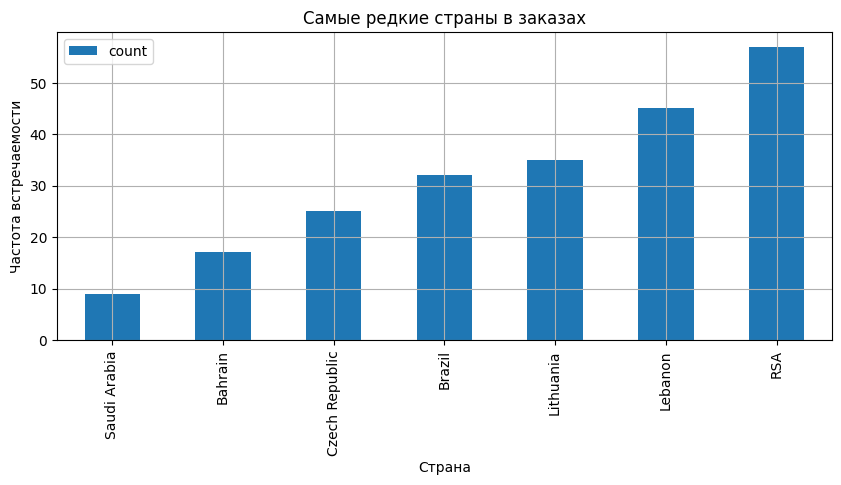

In [22]:
ax = data['Country'].value_counts().sort_values(ascending=True).head(7).plot.bar(figsize=(10,4))
plt.xlabel('Страна')
plt.ylabel('Частота встречаемости')
plt.grid()
plt.title('Самые редкие страны в заказах')
plt.legend();

**Вывод:** подавляющее большинство заказов было сделано из United Kingdom, наименьшее число заказов у Saudi Arabia

## **Распределение заказов по дням недели**

In [23]:
data.groupby("DayOfWeek")["InvoiceNo"].nunique().sort_index()

,InvoiceNo
DayOfWeek,
0,2863
1,3184
2,3455
3,4032
4,2829
6,2169


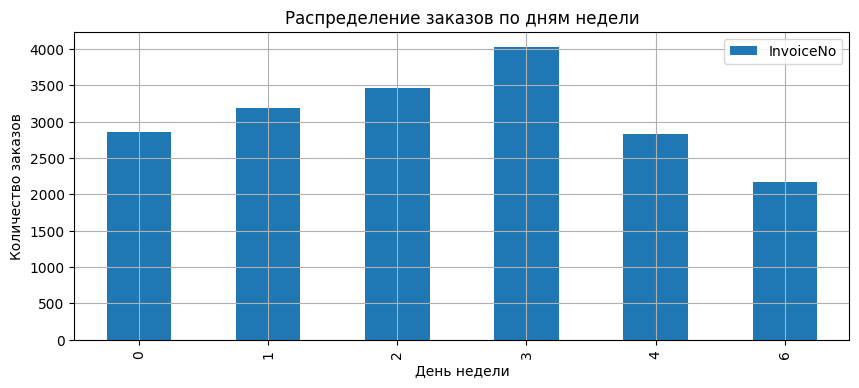

In [24]:
ax = data.groupby("DayOfWeek")["InvoiceNo"].nunique().sort_index().plot.bar(figsize=(10,4))
plt.xlabel('День недели')
plt.ylabel('Количество заказов')
plt.grid()
plt.title('Распределение заказов по дням недели')
plt.legend();

**Вывод:** больше всего заказов совершалось в четверг, меньше всего - в воскресенье. В датафрейме отсутствует информация о заказах по субботам

## **Распределение выручки по месяцам**

In [25]:
data.groupby('Month')['TotalPrice'].sum().reset_index()

,Month,TotalPrice
0,2010-12,570422.730
1,2011-01,568101.310
2,2011-02,446084.920
3,2011-03,594081.760
4,2011-04,468374.331
5,2011-05,677355.150
6,2011-06,660046.050
7,2011-07,598962.901
8,2011-08,644051.040
9,2011-09,950690.202


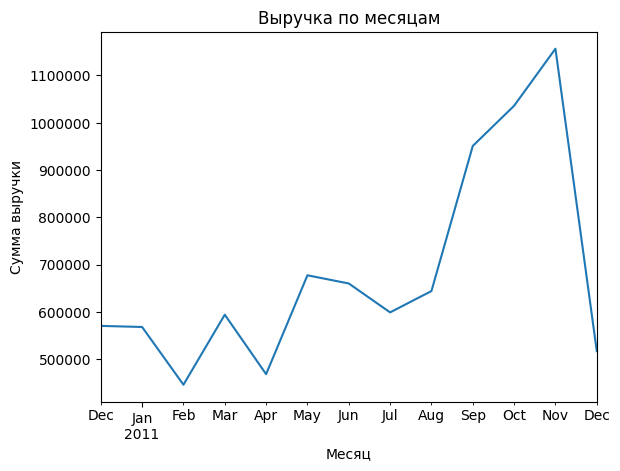

In [26]:
ax = data.groupby('Month')['TotalPrice'].sum().plot()

plt.ticklabel_format(axis='y', style='plain')  # Без 1e6

plt.title('Выручка по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Сумма выручки')

plt.show()

**Вывод**: месяцем с самой низкой выручкой является февраль 2011г., с самой высокой - ноябрь 2011г. Можно отметить, что наблюдается тенденция роста выручки магазина со временем, а низкое значение выручки в последний месяц объясняется тем, что данные ограничиваются 9 декабря 2011г.

## **Исследование аномалий**

Рассмотрим аномалии данных для суммы заказов

<Axes: ylabel='TotalPrice'>

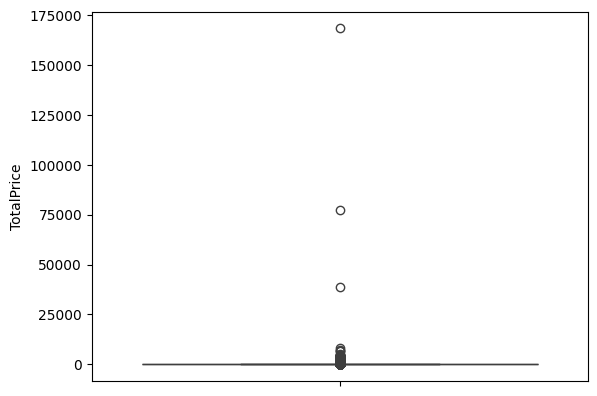

In [27]:
sns.boxplot(data['TotalPrice'])

Мы видим, что в магазине были покупки, сильно отличающиеся по своим значениям. Посмотрим распределение стоимостей большего числа заказов. Для этого добавим фильтрацию выбросов по интерквантильному размаху:

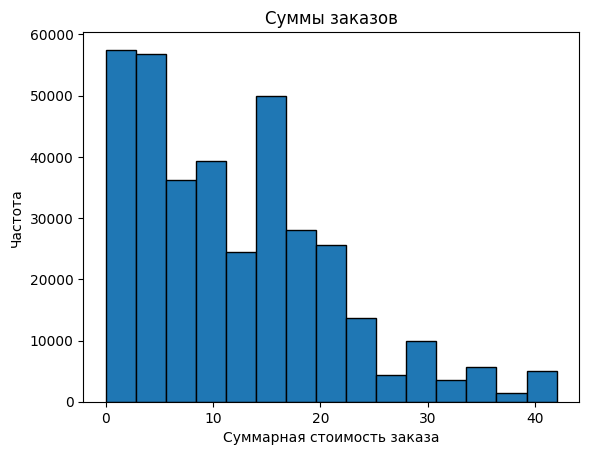

In [33]:
Q1 = data['TotalPrice'].quantile(0.25)
Q3 = data['TotalPrice'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_clean = data[(data['TotalPrice'] >= lower_bound) & (data['TotalPrice'] <= upper_bound)]
plt.hist(data_clean['TotalPrice'], edgecolor = 'black', bins = 15)
plt.xlabel('Суммарная стоимость заказа')
plt.ylabel('Частота')
plt.title('Суммы заказов')
plt.show()

**Вывод:** Подавляющее большинство заказов на площадке имеет стоимость до 25 фунтов-стерлингов

# **Расчет метрик**

**ARPU** (Average Revenue Per User)

In [ ]:
arpu = data.groupby('CustomerID')['TotalPrice'].sum().mean()
float(arpu)

**AOV** (Average Order Value)

In [ ]:
aov = data.groupby('InvoiceNo')['TotalPrice'].sum().mean()
float(aov)

**CRR** (Customer Retention Rate)

Расчитаем Customer Retention Rate за период с января по ноябрь 2011 года включительно:

In [ ]:
start_period = '2011-01-01'
end_period = '2011-12-01'

data_period = data[(data['InvoiceDate'] >= start_period) & (data['InvoiceDate'] < end_period)]

start_customers = data[data['InvoiceDate'] < start_period]['CustomerID'].nunique()
end_customers = data_period['CustomerID'].nunique()

first_purchase = data.groupby('CustomerID')['InvoiceDate'].min().reset_index(name='FirstPurchase')

new_customers = len(first_purchase[(first_purchase['FirstPurchase'] >= start_period) &
                                    (first_purchase['FirstPurchase'] < end_period)])

crr = ((end_customers - new_customers) / start_customers) * 100

print(f"Customer Retention Rate: {crr:.2f}%")

**Вывод:** показатель Customer Retention Rate равен 85.99%, что свидетельствует об отличном удержании клиентов компанией